In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from scipy.optimize import linprog

In [71]:
# 1. Carga el dataset
df = pd.read_csv("Ecommerce_Sales_Prediction_Dataset.csv", encoding="utf-8", sep=",")
df.columns = df.columns.str.strip()  # Elimina espacios en blanco
df.columns = df.columns.str.replace(" ", "_")  # Reemplaza espacios por _
print(list(df.columns)) # Verifica nombres de las columnas detalladamente

['Date', 'Product_Category', 'Price', 'Discount', 'Customer_Segment', 'Marketing_Spend', 'Units_Sold']


In [65]:
# 2. Preprocesamiento
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Detecta el formato correcto + Asegura el formato de fecha
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

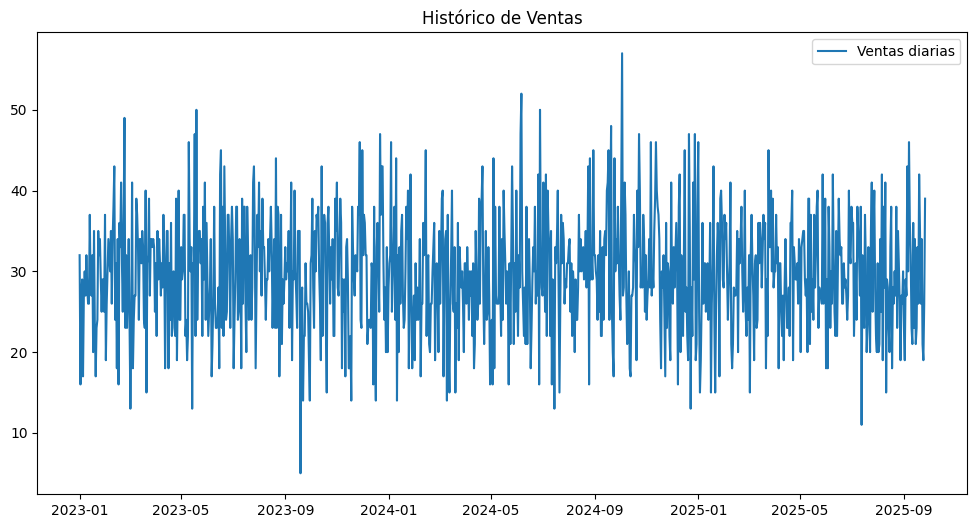

In [66]:
# 3. Visualiza datos
plt.figure(figsize=(12, 6))
plt.plot(df['Units_Sold'], label='Ventas diarias')
plt.legend()
plt.title('Histórico de Ventas')
plt.show()

In [67]:
# 4. Modelo de predicción de demanda con ARIMA
df.index = pd.date_range(start=df.index.min(), periods=len(df), freq='D')  # Forzar frecuencia diaria
model = ARIMA(df['Units_Sold'], order=(5,1,0), freq='D')  # Ajusta los parámetros
df['forecast_arima'] = model.fit().forecast(steps=30) # Predecir 30 días

In [73]:
# 5. Predicción con Prophet
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y", errors='coerce')
df_prophet = df[['Date', 'Units_Sold']]
df_prophet.columns = ['ds', 'y']
model_p = Prophet()
model_p.fit(df_prophet)
futuro = model_p.make_future_dataframe(periods=30)
prediccion = model_p.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpov_3ei2p/ualu3_39.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpov_3ei2p/we8buha2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35663', 'data', 'file=/tmp/tmpov_3ei2p/ualu3_39.json', 'init=/tmp/tmpov_3ei2p/we8buha2.json', 'output', 'file=/tmp/tmpov_3ei2p/prophet_model8myn7a4f/prophet_model-20250324194342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:43:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:43:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [74]:
# 6. Optimización de inventario con programación lineal
costo_unitario = np.random.uniform(5, 20, len(df))
demanda = df['Units_Sold'].values
stock_actual = np.random.randint(10, 100, len(df))

coef = -demanda  # Maximizar ventas
limites = [(0, stock_actual[i]) for i in range(len(demanda))]
res = linprog(c=coef, bounds=limites, method='highs')

In [75]:
# Resultados
print("Stock Óptimo por Producto:", res.x)

Stock Óptimo por Producto: [58. 76. 36. 91. 64. 67. 26. 19. 15. 42. 68. 12. 10. 81. 36. 77. 28. 52.
 30. 41. 26. 24. 94. 12. 47. 56. 61. 63. 45. 74. 82. 45. 64. 23. 60. 19.
 71. 27. 27. 99. 57. 29. 97. 49. 40. 54. 21. 76. 50. 72. 68. 37. 50. 45.
 37. 74. 66. 11. 14. 48. 67. 39. 88. 70. 35. 59. 83. 67. 22. 35. 26. 88.
 82. 59. 54. 29. 72. 49. 48. 84. 85. 58. 24. 65. 24. 70. 82. 16. 52. 49.
 31. 22. 56. 32. 66. 24. 41. 30. 94. 94. 18. 66. 75. 98. 90. 19. 33. 62.
 67. 54. 14. 94. 78. 76. 97. 68. 42. 25. 95. 54. 71. 84. 38. 59. 47. 88.
 92. 96. 83. 70. 95. 49. 65. 97. 11. 23. 46. 32. 63. 77. 11. 14. 62. 74.
 63. 73. 81. 75. 88. 62. 36. 19. 44. 24. 38. 92. 21. 98. 99. 78. 56. 79.
 43. 13. 86. 19. 61. 73. 30. 74. 81. 47. 49. 50. 53. 18. 64. 52. 53. 54.
 72. 43. 32. 26. 50. 36. 66. 77. 92. 72. 18. 39. 59. 50. 87. 70. 56. 91.
 15. 20. 46. 93. 59. 46. 50. 67. 75. 19. 13. 54. 99. 47. 49. 15. 26. 98.
 49. 81. 32. 97. 62. 20. 96. 55. 10. 43. 77. 76. 65. 35. 53. 93. 83. 10.
 87. 95. 91. 25. 77. 10.